In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Part 1 Organize Data

In [2]:
# Read in csv train data
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/train.csv')

display(train_df[0:8])
display(test_df[0:8])

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Extract the labels and pixel values
X_train = train_df.iloc[:1000, 1:].to_numpy()
y_train = train_df.iloc[:1000, 0].to_numpy()
X_test  = test_df.iloc[:1000, 1:].to_numpy()
y_test  = test_df.iloc[:1000, 0].to_numpy()

display(y_train[0:5])
display(X_train[0:5])
print(len(X_train[0]))

array([1, 0, 1, 4, 0])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

784


In [4]:
# Limit the images that are from 0-10 to only 0-7
train_limited = np.where(y_train <= 7)
X_train = X_train[train_limited]
y_train = y_train[train_limited]

test_limited = np.where(y_test <= 7)
X_test = X_test[test_limited]
y_test = y_test[test_limited]

print(y_train.max())
print(y_train.min())

7
0


In [5]:
def reshape_to_2d(matrix,size,num_observations):
    reshaped_matrix = np.zeros((size,size,num_observations))
    for z in range(num_observations):
        for i in range(size):
            for j in range(size):
                a = i*size+j
                reshaped_matrix[i,j,z] = matrix[z][a]
    return reshaped_matrix
            
def reshape_to_1d(matrix,size,num_observations):
    reshaped_matrix = np.zeros((size*size,num_observations))
    for z in range(num_observations):
        for i in range(size):
            for j in range(size):
                a = i*size+j
                reshaped_matrix[a,z] = matrix[i,j,z]
    return reshaped_matrix

In [6]:
# Create reshaped square matrix for the input data for each number image
train_matrix = reshape_to_2d(X_train,28,len(y_train))
test_matrix  = reshape_to_2d(X_test,28,len(y_test))

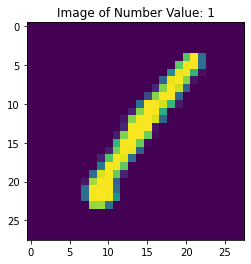

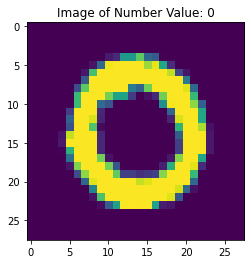

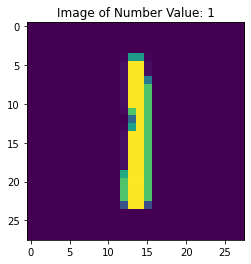

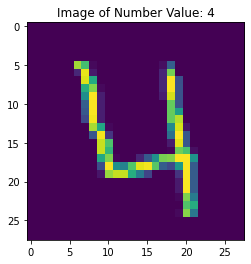

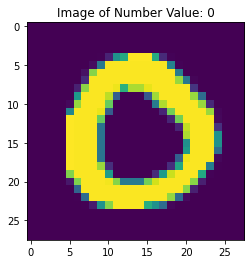

In [7]:
# Print the reshaped square matrix as an image
for i in range(5):
    a = train_matrix[:,:,i]
    plt.imshow(a)
    plt.title(f"Image of Number Value: {y_train[i]}")
    plt.show()

In [8]:
# cast the current 28x28 images to 10x10 images
# Normalize pixel values to max of the pixel values

import scipy.ndimage

resized_train_matrix = np.zeros((10,10,len(y_train)))
resized_test_matrix  = np.zeros((10,10,len(y_test)))

for z in range(len(y_train)):
    resized_train_matrix[:,:,z] = scipy.ndimage.zoom(train_matrix[:,:,z], (10/28, 10/28), order=1)/X_train.max()
for z in range(len(y_test)):
    resized_test_matrix[:,:,z] = scipy.ndimage.zoom(test_matrix[:,:,z], (10/28, 10/28), order=1)/X_test.max()
    
print(resized_train_matrix.shape)
print(resized_test_matrix.shape)

(10, 10, 810)
(10, 10, 810)


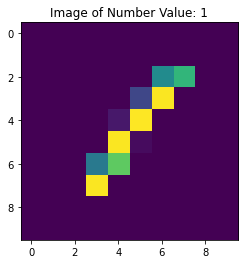

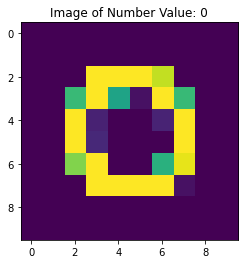

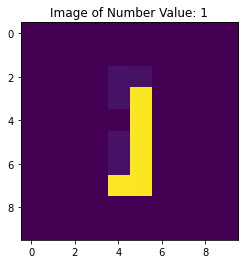

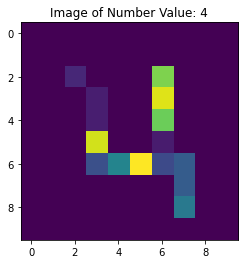

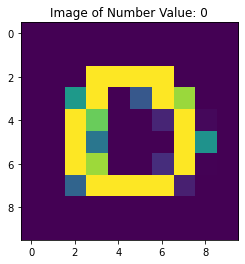

In [9]:
# Print the reshaped square matrix as an image
for i in range(5):
    a = resized_train_matrix[:,:,i]
    plt.imshow(a)
    plt.title(f"Image of Number Value: {y_train[i]}")
    plt.show()

# Part 2 Train the Hopfield Network

In [10]:
# # Create hopfield networks
# binary_train_images = (resized_train_matrix > 0.5).astype(int) * 2 - 1
# binary_test_images = (resized_test_matrix > 0.5).astype(int) * 2 - 1

# print(binary_train_images[:,:,1])

In [11]:
# # Flatten images from square 10x10 to 1 dimensional 100
# flattened_train_images = reshape_to_1d(binary_train_images,)
# flattened_test_images


# flattened_train_images = np.zeros((100,len(y_train)))
# flattened_test_images  = np.zeros((100,len(y_test)))

# for z in range(len(y_train)):
#     for i in range(10):
#         for j in range(10):
#             a = i*10+j
#             flattened_train_images[a,z] = binary_train_images[i,j,z]
            
# for z in range(len(y_test)):
#     for i in range(10):
#         for j in range(10):
#             a = i*10+j
#             flattened_test_images[a,z] = binary_test_images[i,j,z]

In [12]:
# # Create an array of 8 exemplars 0-7
# exemplar_list = []
# for i in range(8):
#     number_value = np.where(y_train == i)
#     exemplar_list.append(flattened_train_images[:,number_value[0][0]])
    
# print((exemplar_list[0]))

In [13]:
# def create_weight_matrix(input_size,exemplars):
#     weights = np.zeros((input_size, input_size))
#     for exemplar in exemplars:
#         weights += np.outer(exemplar, exemplar)
#     np.fill_diagonal(weights, 0)
#     return weights

In [14]:
# input_size = 100
# weights = create_weight_matrix(input_size,exemplar_list)

In [15]:
# def test_network(noisy_exemplar, weight_matrix, num_sequences):
#     for i in range(num_sequences):
#         exemplar_output = np.sign(np.dot(weight_matrix,noisy_exemplar))
#         noisy_exemplar = exemplar_output
#     return exemplar_output

# def resize_1d_to_2d(matrix):
#     dimension = int(np.sqrt(len(matrix)))
#     output_square_matrix = np.zeros((dimension,dimension))
#     for i in range(dimension):
#         for j in range(dimension):
#             a = i*dimension+j
#             output_square_matrix[i,j] = matrix[a]
#     return output_square_matrix

In [16]:
# image_numeric_value = 4
# noisy_exemplar_index = np.where(y_train == image_numeric_value)
# noisy_exemplar = flattened_train_images[:,noisy_exemplar_index[0][1]]

# exemplar_output = test_network(noisy_exemplar,weights,4)
# square = resize_1d_to_2d(exemplar_output)
# plt.imshow(square)
# plt.title(f"Image of Number Value: {y_train[i]}")
# plt.show()

In [17]:
# def add_noise(pattern, noise_level):
#     # Add a matrix and a noise decimal value which equates to a percentage that any given value in that matrix would flip to the opposite binary
#     # value
#     pass

# Part 3 Restrictive Boltzmann Machine

In [18]:
# Flatten images from square 10x10 to 1 dimensional 100
flattened_train_images = reshape_to_1d(train_matrix,28,len(y_train))
flattened_test_images  = reshape_to_1d(test_matrix,28,len(y_train))

# Re-Referencing Pre-Processed Data
print(resized_train_matrix.shape)
print(flattened_train_images.shape)
print(y_train.shape)
print(resized_test_matrix.shape)
print(flattened_test_images.shape)
print(y_test.shape)


(10, 10, 810)
(784, 810)
(810,)
(10, 10, 810)
(784, 810)
(810,)


In [19]:
# Initialize nodes for the RBM
# Number of visible nodes
num_visible_nodes = flattened_train_images.shape[0]

# Number of hidden nodes
num_hidden_nodes = 64

# Initialize the weight matrix (n_visible x n_hidden)
np.random.seed(46)
weights = np.random.rand(num_visible_nodes, num_hidden_nodes) * 0.01

# Initialize the visible and hidden biases
visible_biases = np.zeros((num_visible_nodes,1))
hidden_biases = np.zeros((1,num_hidden_nodes))


In [20]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sampling(probabilities):
    prob_comparison_matrix = np.random.rand(*probabilities.shape)
    output_binary_matrix = (prob_comparison_matrix < probabilities).astype(np.int32)
    return output_binary_matrix

def RBM_Training(weights,visible_biases,hidden_biases,learning_rate,batch_size,epochs):
    for epoch in range(n_epochs):
        for batch_idx in range(n_batches):
            start = batch_idx * batch_size
            end = (batch_idx + 1) * batch_size

            visible_initial = flattened_train_images[:, start:end]    
            hidden_prob = sigmoid(np.dot(visible_initial.T, weights) + hidden_biases)
            hidden_binary = sampling(hidden_prob)

            visible_iter_prob = sigmoid(np.dot(weights, hidden_binary.T) + visible_biases)
            visible_iter_binary = sampling(visible_iter_prob)
            hidden_iter_prob = sigmoid(np.dot(visible_iter_binary.T, weights) + hidden_biases)
            hidden_iter_binary = sampling(hidden_iter_prob)

            delta_w = learning_rate * (np.dot(hidden_binary.T, visible_initial.T) - \
                                       np.dot(hidden_iter_binary.T, visible_iter_binary.T)) / batch_size
            weights += delta_w.T
            visible_biases += learning_rate * np.mean(visible_initial - visible_iter_binary, axis=1, keepdims=True)
            hidden_biases += learning_rate * np.mean(hidden_binary - hidden_iter_binary, axis=0, keepdims=True)
        
    return weights,visible_biases,hidden_biases

def reconstruct_image(test_data, w, vb, hb):
    h_prob = sigmoid(np.dot(test_data.T, w) + hb)
    h = sampling(h_prob)
    v_prob = sigmoid(np.dot(h, w.T) + vb.T)
    v_reconstructed = sampling(v_prob)
    return v_reconstructed.T
    

Learning rate: 0.5


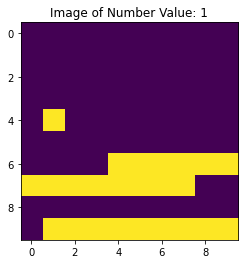

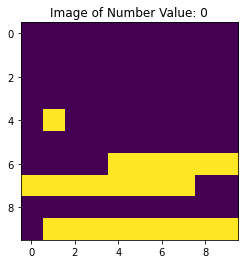

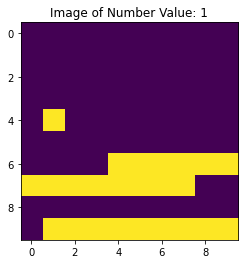

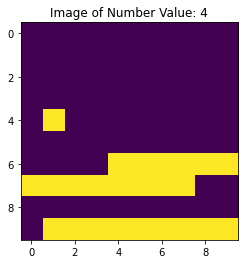

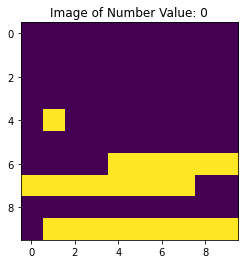

In [23]:
# Set hyperparameters
n_epochs = 80
batch_size = 10
learning_rates = [0.5]
n_samples = flattened_train_images.shape[1]
n_batches = int(n_samples / batch_size)

for learning_rate in learning_rates:
    print(f'Learning rate: {learning_rate}')
    # Create copies of current weights and biases
    weights_copy = weights.copy()
    visible_biases_copy = visible_biases.copy()
    hidden_biases_copy = hidden_biases.copy()

    # Run Training function
    weights_copy,visible_biases_copy,hidden_biases_copy = RBM_Training\
        (weights_copy,visible_biases_copy,hidden_biases_copy,learning_rate,batch_size,n_epochs)

    # Reconstruct images with trained weights and biases
    reconstructed_images = reconstruct_image(flattened_test_images, weights_copy, visible_biases_copy, hidden_biases_copy)

    square_reconstructed_test_images  = np.zeros((10,10,len(reconstructed_images)))

    for z in range(len(reconstructed_images)):
        for i in range(10):
            for j in range(10):
                a = i*10+j
                square_reconstructed_test_images[i,j,z] = reconstructed_images[a,z] 

    # Print the reshaped square matrix as an image
    for i in range(5):
        a = square_reconstructed_test_images[:,:,i]
        plt.imshow(a)
        plt.title(f"Image of Number Value: {y_test[i]}")
        plt.show()